In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikeras
from functions import encodingSplitting, fullRead, scaling



In [ ]:
with open ("resultsModelsMLP.pkl", 'rb') as f:
        resultsModelsMLP = pickle.load(f)

In [4]:
paths = ["plasmFlav_ord.csv", "plasmAnt_ord.csv", "urineFlav_ord.csv", "urineAnt_ord.csv"]
paths = ["data/" + s for s in paths]

'''
resultsModelsRF = {}
resultsScoresRF = {}
for path in paths:
    df, df_name = fullRead(path, sep = ",", anthro = True)
    
    #resultsModelsRF["modelRFMet{0}".format(df_name)], resultsScoresRF["modelRFMet{0}".format(df_name)] = randomForestReg(scaling(df), df_name, met = True)
    #resultsModelsRF["modelRFFull{0}".format(df_name)], resultsScoresRF["modelRFFull{0}".format(df_name)] = randomForestReg(scaling(df), df_name, met = False)
'''

df, df_name = fullRead("data/plasmFlav_ord.csv", sep = ",", anthro = True)

X_met, y_met, X_metTrain, X_metTest, y_metTrain, y_metTest, X_full, y_full, X_fullTrain, X_fullTest, y_fullTrain, y_fullTest = encodingSplitting(df)

In [17]:
dummies_sweetener = pd.from_dummies(X_metTest[['Sweetener_SA', 'Sweetener_ST','Sweetener_SU']]).replace("Sweetener_", "",regex=True).set_index(X_metTest.index-1)
dummies_sex = pd.from_dummies(X_metTest[['Sex_MAN', "Sex_WOMAN"]]).replace("Sex_", "",regex=True).set_index(X_metTest.index-1)

pred_prueba = resultsModelsMLP["modelMLPMetplasmFlav"].predict(X_metTest)   
pred_prueba_DF = pd.DataFrame(pred_prueba, index = X_metTest.index-1, columns=y_metTest.columns).add_suffix("_pred").join(y_metTest.add_suffix('_test')).fillna(0) 
pred_prueba_DF["Sex"] = dummies_sex
pred_prueba_DF["Sweetener"] = dummies_sweetener

In [19]:
y_metTest

,E,E.S,Total.E,HE.G,N.G
36,0.444444,0.0,0.0,0.000796,0.046924
90,0.555556,0.3,0.0,0.001990,0.043374
94,0.444444,0.0,0.0,0.000199,0.074667
178,0.111111,0.0,0.0,0.000199,0.057853
8,0.333333,0.2,0.0,0.040199,0.062866
81,0.333333,0.0,0.0,0.000199,0.071491
124,0.888889,0.1,0.0,0.000796,0.180969
214,0.111111,0.0,0.0,0.001592,0.044495
62,0.222222,0.3,0.0,0.000796,0.095840
110,0.555556,0.1,0.0,0.001990,0.031542


<Axes: xlabel='E_pred', ylabel='E_test'>

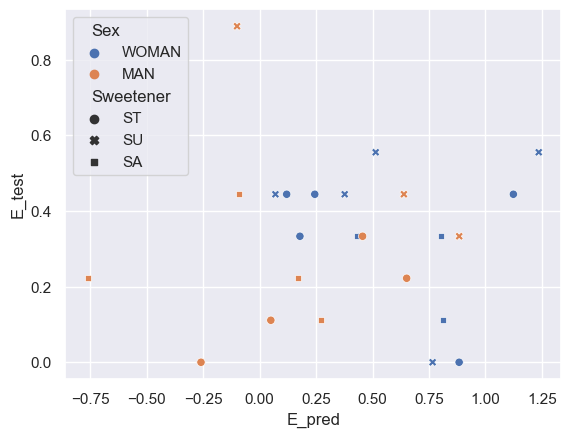

In [47]:
sns.set_theme()
sns.scatterplot(data = pred_prueba_DF, x = "E_pred", y = "E_test", hue= "Sex", style = "Sweetener")

#obtain m (slope) and b(intercept) of linear regression line
#m, b = np.polyfit(x = pred_prueba_DF["E_pred"], y = pred_prueba_DF["E_test"], deg = 1)

#add linear regression line to scatterplot 
#plt.plot(pred_prueba_DF["E_pred"], m*pred_prueba_DF["E_pred"]+b)

# another method
#p = np.poly1d(b)
#pred_prueba_DF['trendline'] = p(pred_prueba_DF["E_pred"])

#pred_prueba_DF.trendline.sort_index(ascending=False)


In [48]:
def scatter_text(x, y, text_column, data):
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, hue = "Sex", style="Sweetener")
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][text_column[line]]+0.01, data[y][text_column[line]], 
                 text_column[line], horizontalalignment='left', 
                 size='x-small', color='black', weight='semibold')
    plt.savefig("output_prueba.png")
    return p1

scatter_text(x="E_pred", y = "E_test", text_column=pred_prueba_DF.index, data=pred_prueba_DF)

#obtain m (slope) and b(intercept) of linear regression line
#m, b = np.polyfit(x=pred_prueba_DF["E_pred"], y=pred_prueba_DF["E_test"], deg = 1)

#add linear regression line to scatterplot 
#plt.plot(pred_prueba_DF["E_pred"], m*pred_prueba_DF["E_pred"]+b)

TypeError: scatterplot() got multiple values for argument 'data'

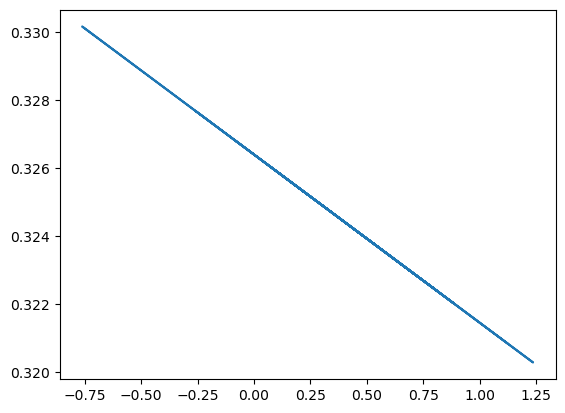

In [33]:
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x=pred_prueba_DF["E_pred"], y=pred_prueba_DF["E_test"], deg = 1)

#add linear regression line to scatterplot 
plt.plot(pred_prueba_DF["E_pred"], m*pred_prueba_DF["E_pred"]+b)

In [36]:
pred_prueba_DF

,E_pred,E.S_pred,Total.E_pred,HE.G_pred,N.G_pred,E_test,E.S_test,Total.E_test,HE.G_test,N.G_test,Sex,Sweetener
36,1.123567,2.087684,-0.656404,-1.462344,-2.004210,0.444444,0.0,0.0,0.000796,0.046924,WOMAN,ST
90,0.513794,2.719115,-0.532054,-1.422124,-1.774147,0.555556,0.3,0.0,0.001990,0.043374,WOMAN,SU
94,0.069746,2.558319,-0.811066,-1.561093,-1.764581,0.444444,0.0,0.0,0.000199,0.074667,WOMAN,SU
178,0.812892,2.895037,-1.024995,-0.382187,-2.149371,0.111111,0.0,0.0,0.000199,0.057853,WOMAN,SA
8,0.178224,2.024772,-0.831339,-1.896853,-0.928866,0.333333,0.2,0.0,0.040199,0.062866,WOMAN,ST
79,-0.259926,3.142752,-0.360052,-1.672654,-1.625137,0.000000,0.0,0.0,0.000000,0.000000,MAN,ST
124,-0.100243,3.415123,-0.236958,-1.697690,-2.105267,0.888889,0.1,0.0,0.000796,0.180969,MAN,SU
214,0.272986,3.304555,-0.432624,-1.237848,-2.380190,0.111111,0.0,0.0,0.001592,0.044495,MAN,SA
62,0.651005,3.503764,-1.014131,-0.291436,-2.462897,0.222222,0.3,0.0,0.000796,0.095840,MAN,ST
110,1.235937,2.681010,-1.653174,0.119076,-1.786904,0.555556,0.1,0.0,0.001990,0.031542,WOMAN,SU
